In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = load_model(os.path.join('models','Classify_White_Blood_Cell_Final_Cropped.h5'))

In [3]:
model

conv2d_4 (3, 3, 3, 8)
8


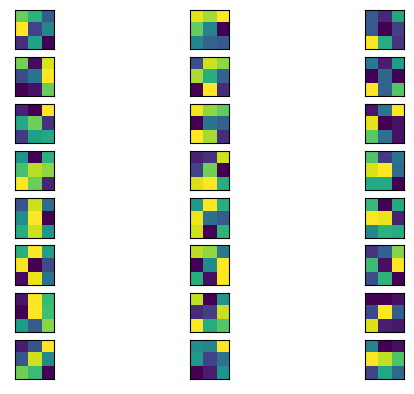

conv2d_5 (3, 3, 8, 16)
16


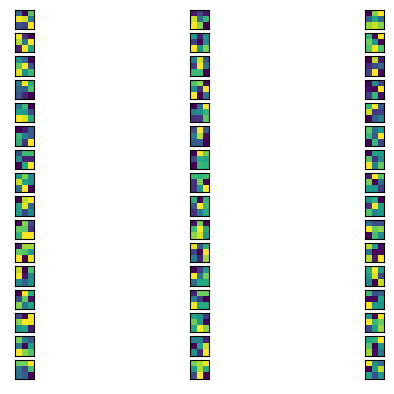

conv2d_6 (3, 3, 16, 32)
32


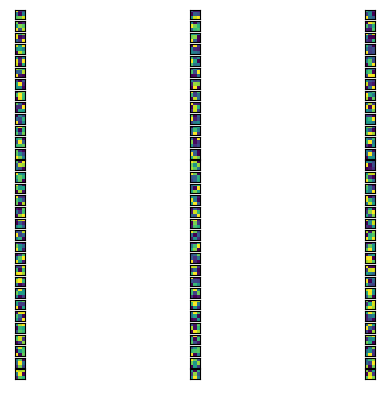

conv2d_7 (3, 3, 32, 16)
16


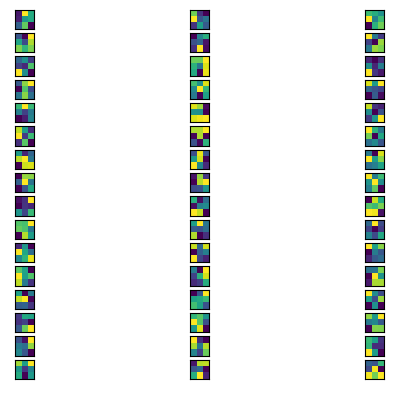

In [4]:
#Iterate thru all the layers of the model
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()

        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)
        print(filters.shape[3])
        filter_cnt=1

        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [5]:

from PIL import Image

1/1 [==============================] - 0s 73ms/step
(1, 99, 99, 8)
(1, 97, 97, 16)
(1, 48, 48, 16)
(1, 46, 46, 32)
(1, 23, 23, 32)
(1, 21, 21, 16)
(1, 10, 10, 16)
(1, 1600)
(1, 360)
(1, 5)
1/1 [==============================] - 0s 16ms/step
(1, 99, 99, 8)


C:\Users\Rodolfo Trevisol\AppData\Local\Temp\ipykernel_17004\742295127.py:58: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


(1, 97, 97, 16)
(1, 48, 48, 16)
(1, 46, 46, 32)
(1, 23, 23, 32)
(1, 21, 21, 16)
(1, 10, 10, 16)
(1, 1600)
(1, 360)
(1, 5)
1/1 [==============================] - 0s 15ms/step
(1, 99, 99, 8)
(1, 97, 97, 16)
(1, 48, 48, 16)
(1, 46, 46, 32)
(1, 23, 23, 32)
(1, 21, 21, 16)
(1, 10, 10, 16)
(1, 1600)
(1, 360)
(1, 5)
1/1 [==============================] - 0s 16ms/step
(1, 99, 99, 8)
(1, 97, 97, 16)
(1, 48, 48, 16)
(1, 46, 46, 32)
(1, 23, 23, 32)
(1, 21, 21, 16)


C:\Users\Rodolfo Trevisol\AppData\Local\Temp\ipykernel_17004\742295127.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure( figsize=(scale * n_features, scale) )


(1, 10, 10, 16)
(1, 1600)
(1, 360)
(1, 5)


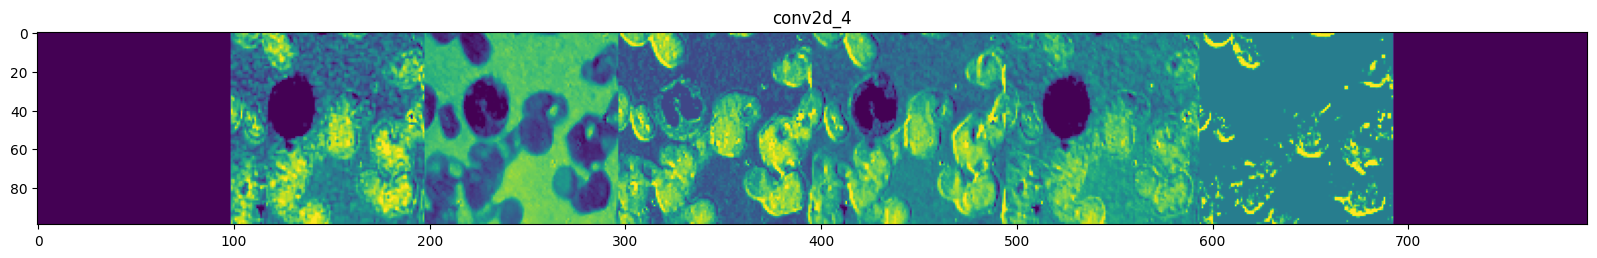

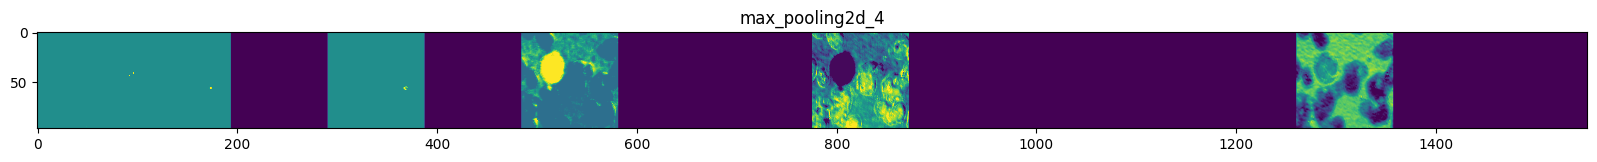

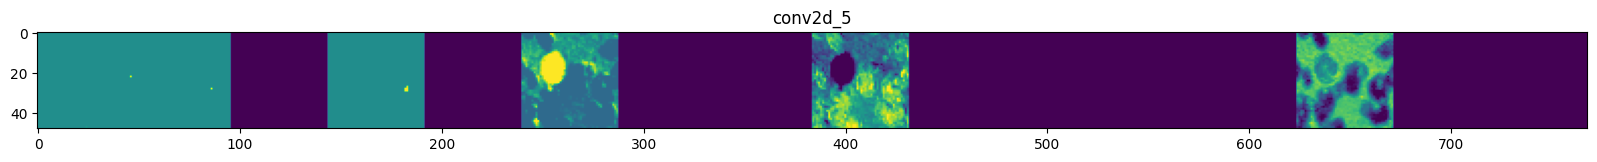

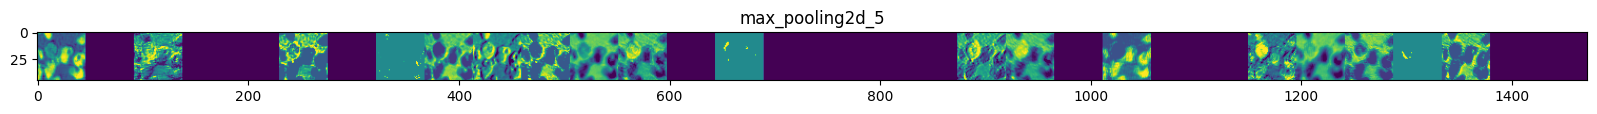

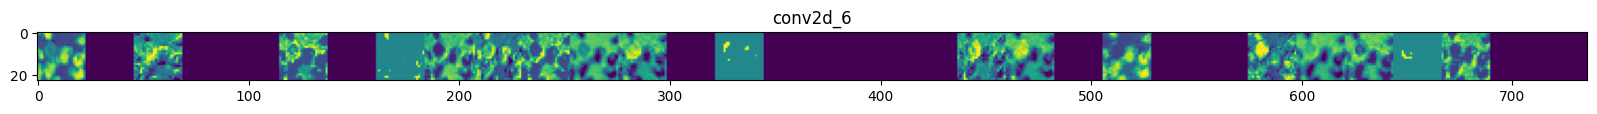

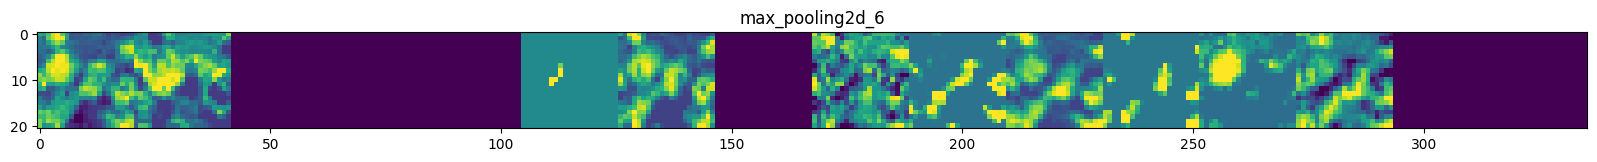

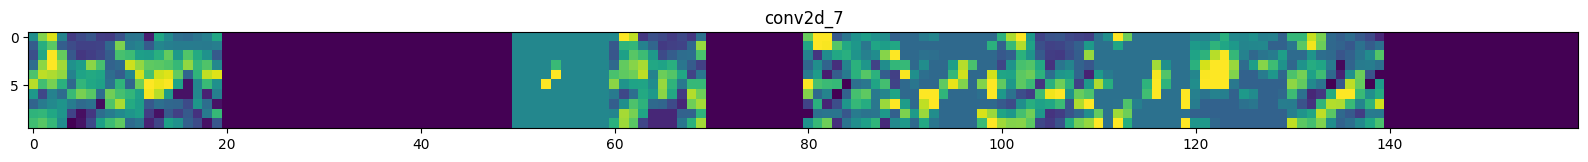

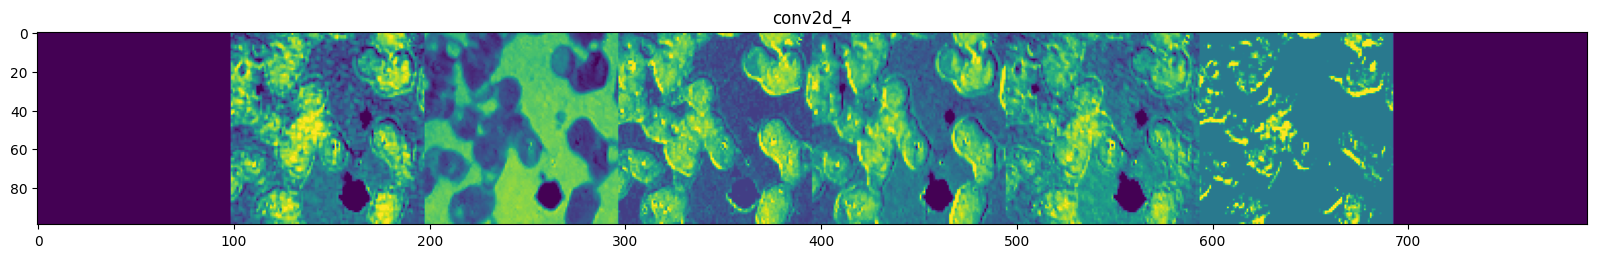

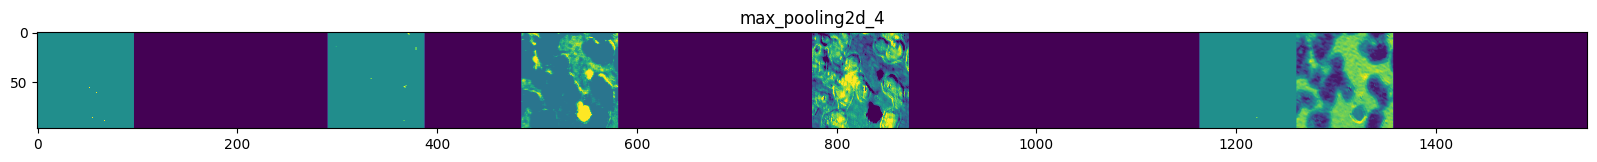

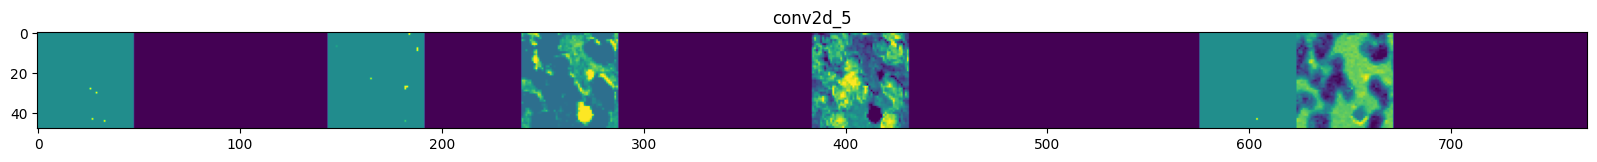

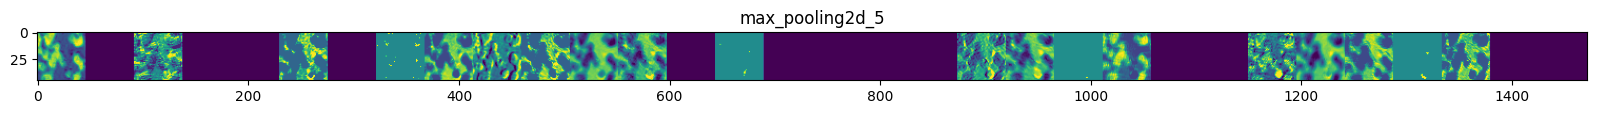

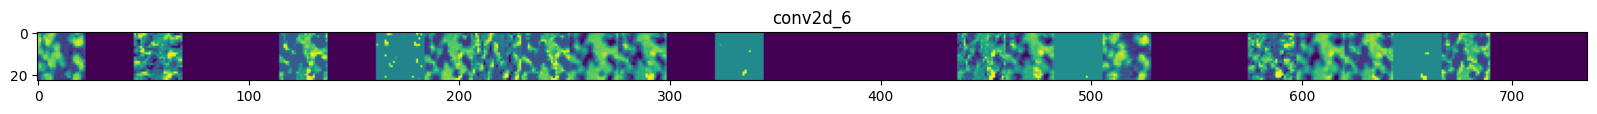

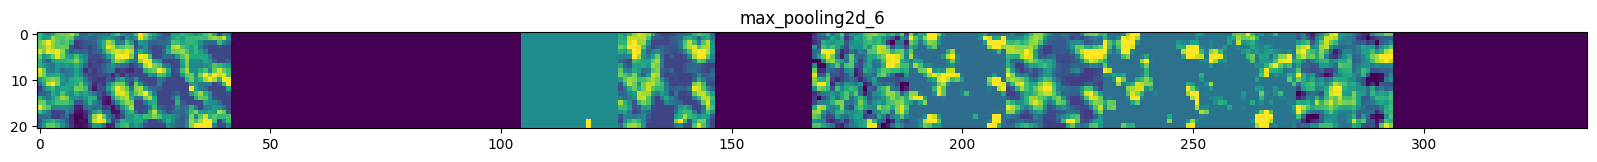

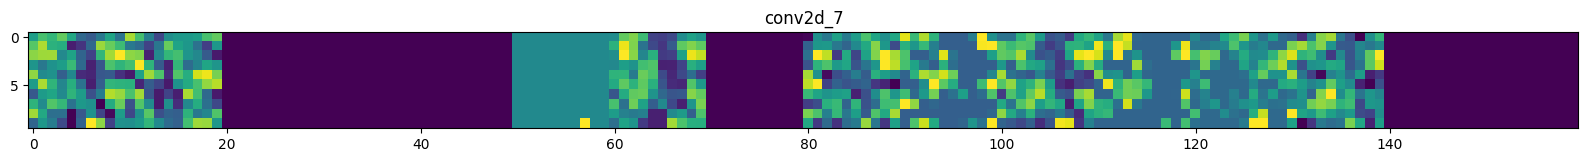

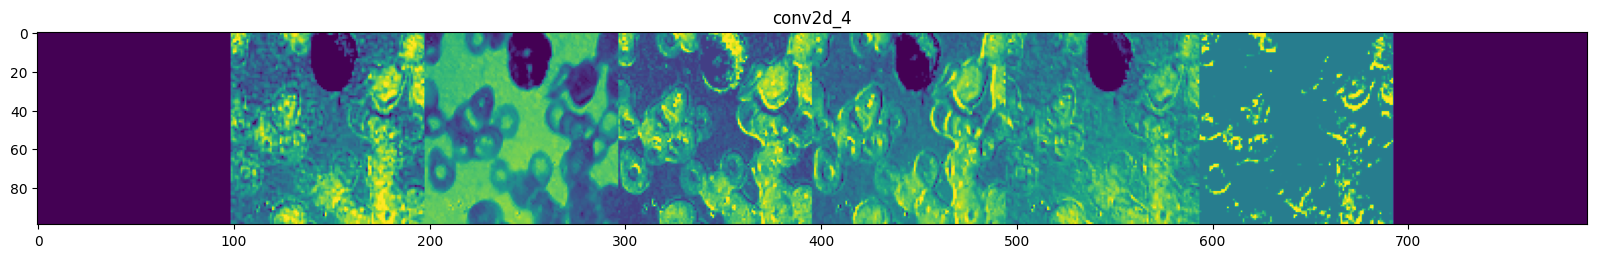

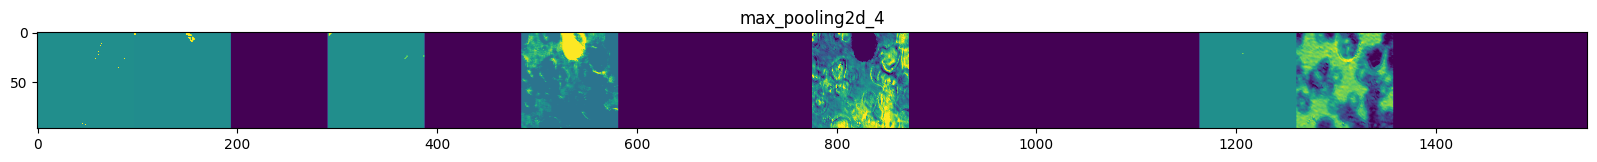

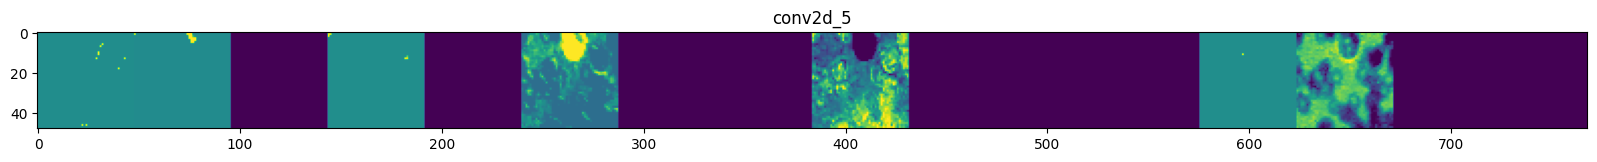

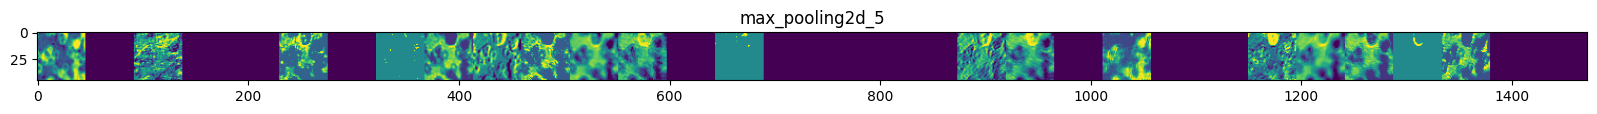

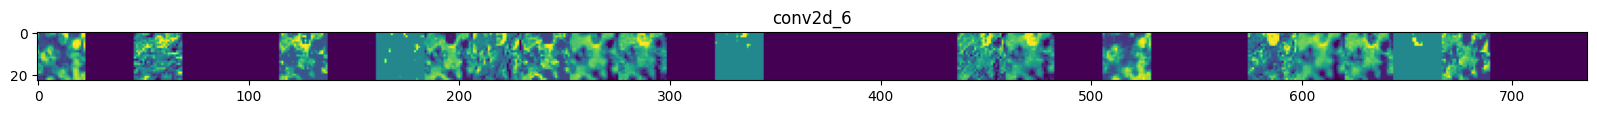

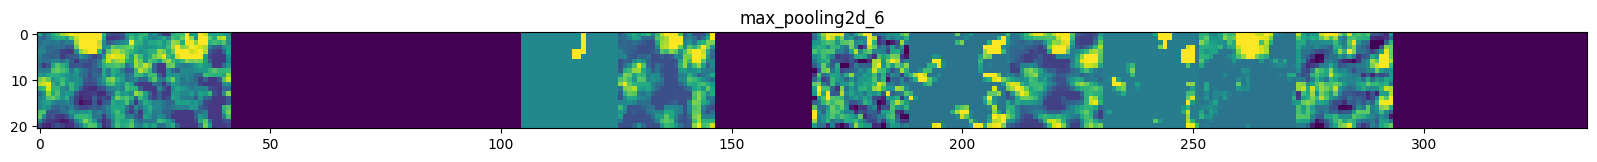

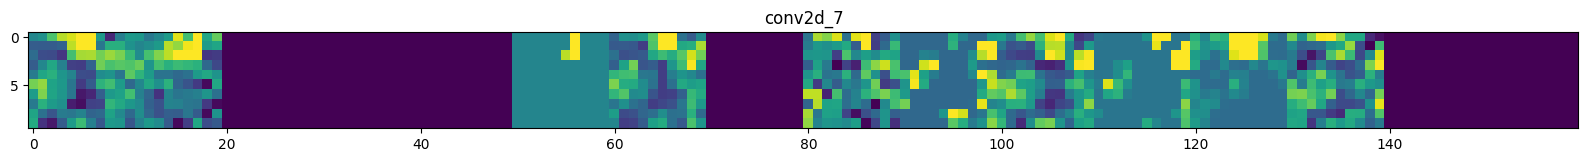

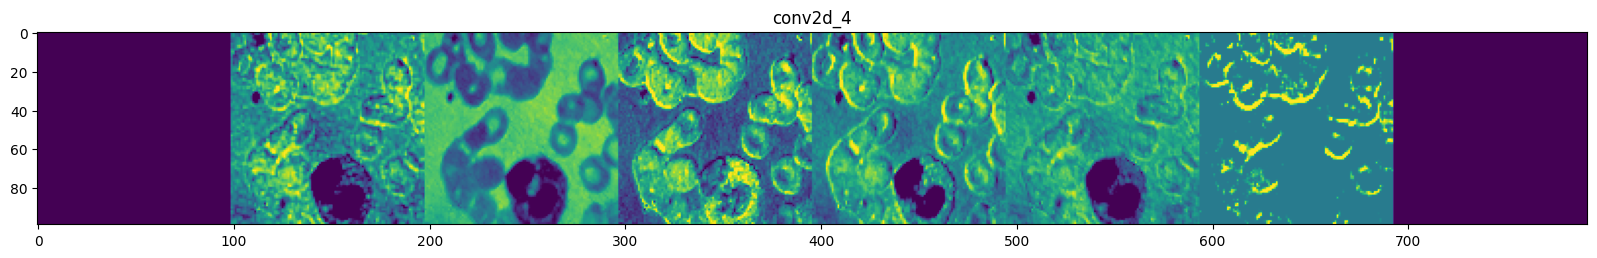

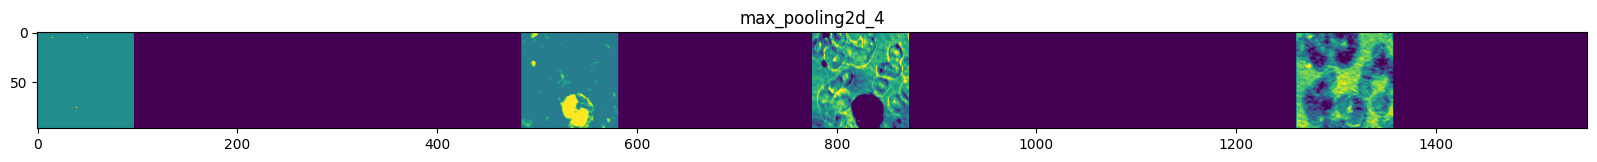

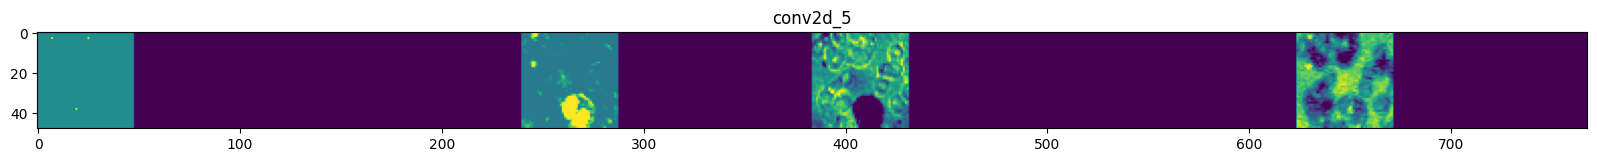

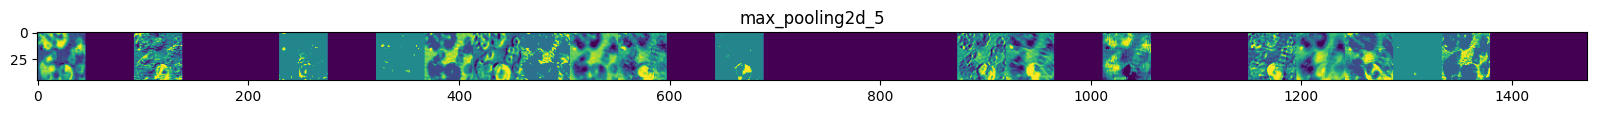

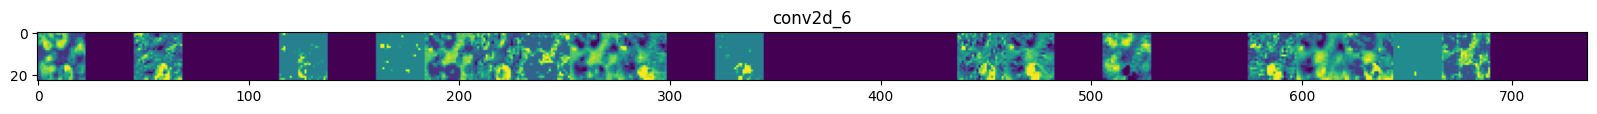

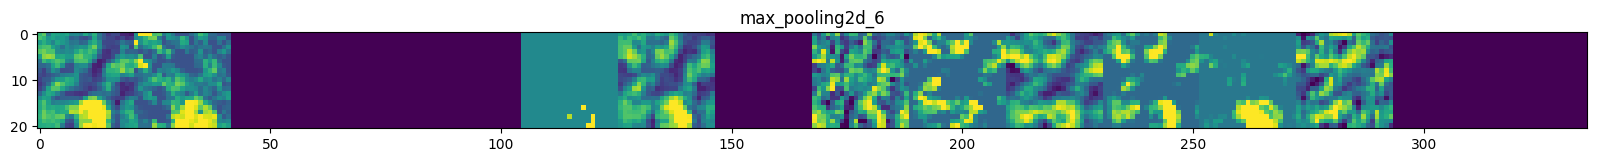

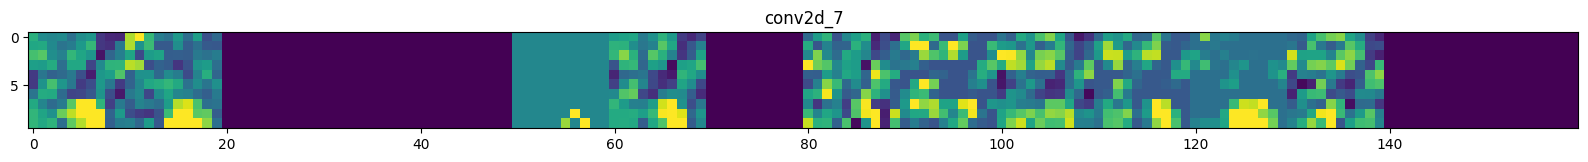

In [7]:
img_path='.\\\BA_695174.jpg' #dog
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#Load the input image
for img_path in os.listdir('test'):
    if 'BloodImage' in img_path:
        img = Image.open(os.path.join('test',img_path))

        # Size of the image in pixels (size of original image)
        # (This is not mandatory)
        width, height = img.size

        # Setting the points for cropped image
        left = 90
        top = 90
        right = 290
        bottom = 290

        # Cropped image of above dimension
        #img = img.crop((left, top, right, bottom))
        img = img.resize((200,200))

        # Convert ht image to Array of dimension (150,150,3)
        x   = img_to_array(img)                           
        x   = x.reshape((1,) + x.shape)

        # Rescale by 1/255
        x /= 255.0

        # Let's run input image through our vislauization network
        # to obtain all intermediate representations for the image.
        successive_feature_maps = visualization_model.predict(x)

        # Retrieve are the names of the layers, so can have them as part of our plot
        layer_names = [layer.name for layer in model.layers]

        for layer_name, feature_map in zip(layer_names, successive_feature_maps):
            print(feature_map.shape)
            if len(feature_map.shape) == 4:

                # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
                n_features = feature_map.shape[-1]  # number of features in the feature map
                size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

                # We will tile our images in this matrix
                display_grid = np.zeros((size, size * n_features))

                # Postprocess the feature to be visually palatable
                for i in range(n_features):
                    x  = feature_map[0, :, :, i]
                    x -= x.mean()
                    x /= x.std ()
                    x *=  64
                    x += 128
                    x  = np.clip(x, 0, 255).astype('uint8')
                    # Tile each filter into a horizontal grid
                    display_grid[:, i * size : (i + 1) * size] = x

                # Display the grid
                scale = 20. / n_features
                plt.figure( figsize=(scale * n_features, scale) )
                plt.title ( layer_name )
                plt.grid  ( False )
                plt.imshow( display_grid, aspect='auto', cmap='viridis' )